In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

In [7]:
df = pd.read_csv('conf_mat.csv')
df.shape

(65, 8)

In [8]:
df.head()

,Jumlah head,Kategori,TP,FP,FN,TN,F1-Score (%),Mean F1-Score (%)
0,0,ENTY,81,11,13,386,87.09,93.57
1,0,DESC,136,5,2,348,97.49,NaN
2,0,HUM,61,6,4,420,92.42,NaN
3,0,LOC,77,5,4,405,94.47,NaN
4,0,NUM,107,2,6,376,96.39,NaN


In [9]:
labels = df['Kategori'].unique()
colors = ['cyan', 'orange', '']

In [10]:
# x = len(labels)

# for i in x:
#     plt.bar(i-0.2)

In [11]:
df[df['Kategori'] == 'ENTY']['F1-Score (%)'].values

array([87.09, 86.51, 81.56, 77.77, 81.87, 81.39, 85.87, 86.33, 84.88,
       83.42, 87.09, 85.71, 84.91])

<Axes: xlabel='Kategori'>

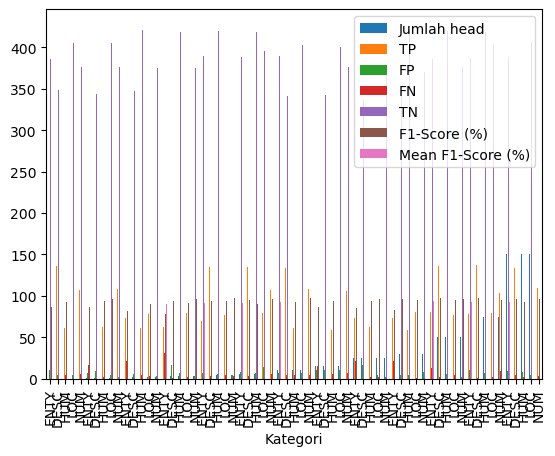

In [12]:
df.plot(x='Kategori', kind='bar', stacked=False)

In [13]:
df_2 = pd.read_csv('conf_by_category.csv')
df_2.head(6)

,Kategori,head 0,head 1,head 2,head 3,head 5,head 6,head 10,head 15,head 25,head 30,head 50,head 75,head 150
0,ENTY,87.09,86.52,81.56,77.78,81.87,81.40,85.88,86.34,84.88,83.43,87.09,85.72,84.91
1,DESC,97.49,95.37,95.65,94.16,93.75,95.07,94.37,94.67,93.79,96.75,97.49,97.17,96.06
2,HUM,92.42,93.33,93.13,90.91,91.60,90.07,93.13,94.40,94.03,91.47,92.42,91.73,92.64
3,LOC,94.48,95.76,90.17,91.33,93.33,90.81,94.61,94.19,95.76,94.68,94.48,95.18,93.75
4,NUM,96.40,96.86,95.96,96.43,96.92,96.83,96.86,95.93,95.93,95.69,96.40,94.98,96.49
5,Mean,93.58,93.57,91.29,90.12,91.49,90.84,92.97,93.11,92.88,92.40,93.58,92.96,92.77


In [14]:
df_2.items()

<generator object DataFrame.items at 0x10b2d4f40>

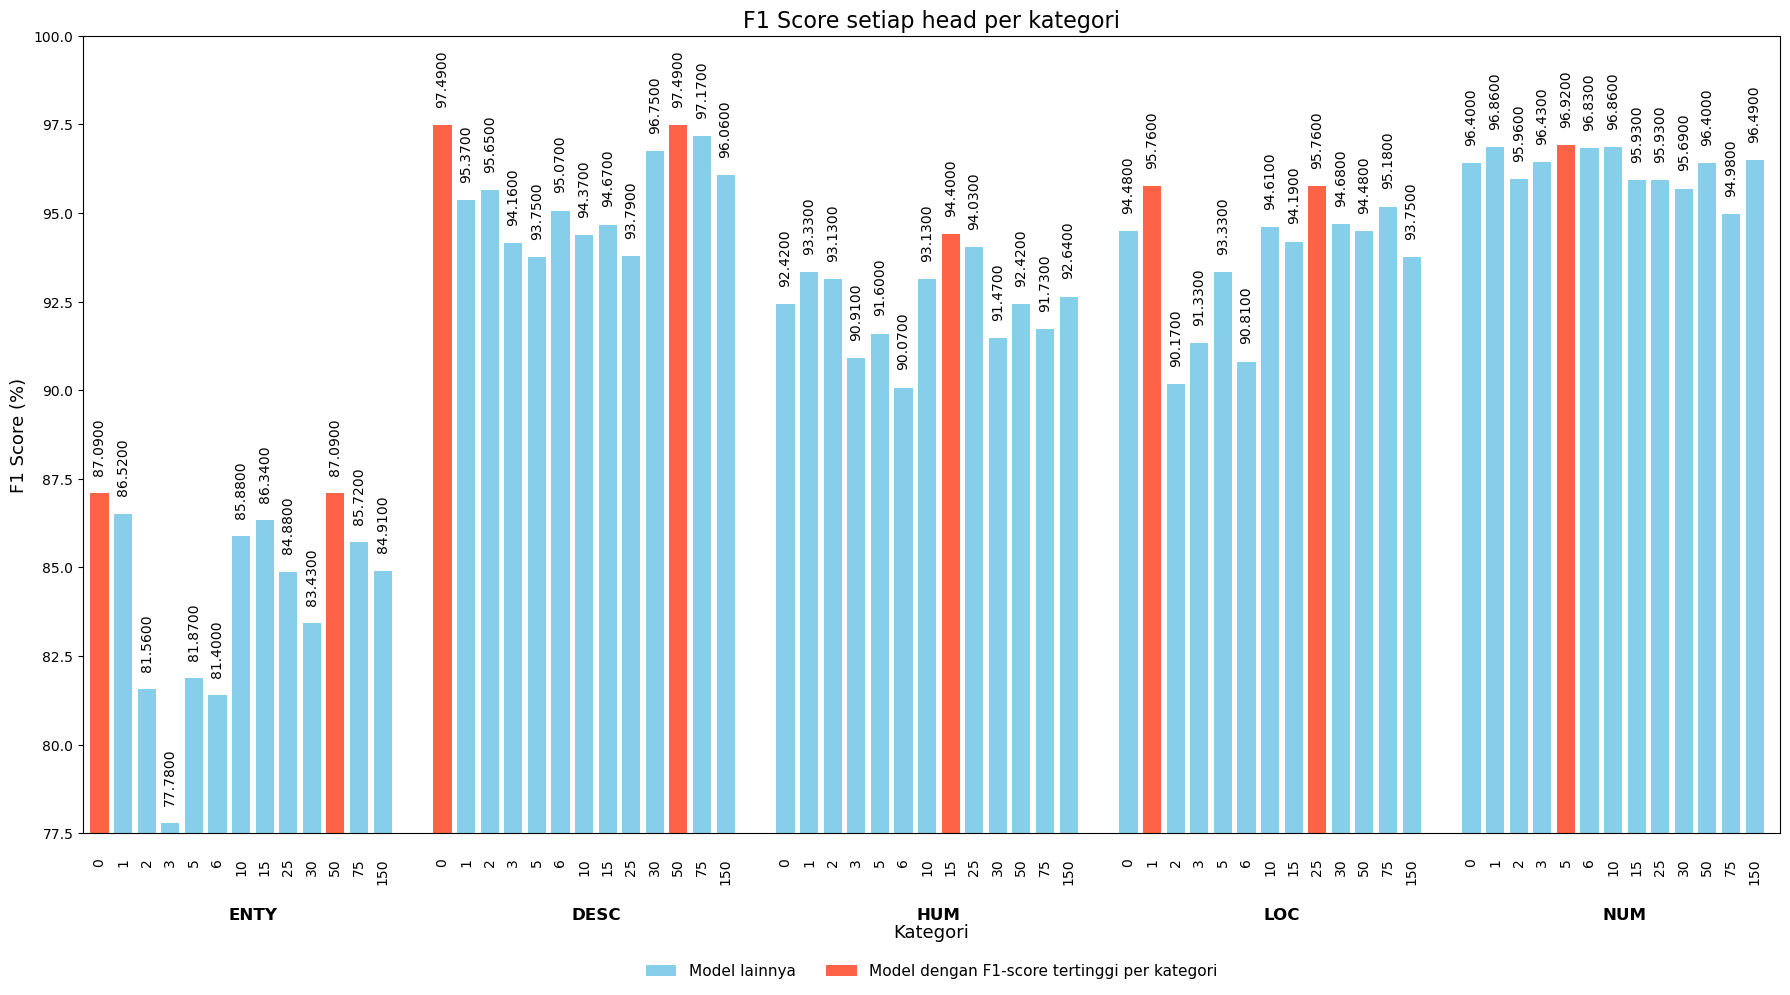

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV
df = pd.read_csv("conf_by_category.csv")

# Convert head columns to numeric
head_columns = df.columns[1:]
df[head_columns] = df[head_columns].apply(pd.to_numeric, errors='coerce')

# Remove 'Mean' row
df_no_mean = df[df['Kategori'] != 'Mean'].reset_index(drop=True)

# Config
categories = df_no_mean['Kategori']
num_heads = len(head_columns)
num_categories = len(categories)

bar_width = 0.05
bar_gap = 0.015
group_spacing = 0.1

group_width = num_heads * (bar_width + bar_gap)
x = np.arange(num_categories) * (group_width + group_spacing)
offsets = np.arange(num_heads) * (bar_width + bar_gap)

# Get mask of max F1 values (highlight all maxes)
max_mask = df_no_mean[head_columns].eq(df_no_mean[head_columns].max(axis=1), axis=0)

# Plot
plt.figure(figsize=(18, 10))

for i, head in enumerate(head_columns):
    scores = df_no_mean[head]
    is_best = max_mask[head]
    bar_positions = x + offsets[i]
    colors = ['tomato' if best else 'skyblue' for best in is_best]

    bars = plt.bar(bar_positions, scores, width=bar_width, color=colors)

    for j, bar in enumerate(bars):
        score = scores.iloc[j]
        # Head label below bar
        plt.text(bar.get_x() + bar.get_width() / 2, 76.8, head.replace('head ', ''), 
                 ha='center', va='top', fontsize=10, rotation=90)
        # Score above bar
        plt.text(bar.get_x() + bar.get_width() / 2, score + 0.5, f'{score:.4f}', 
                 ha='center', va='bottom', fontsize=10, rotation=90)

# Remove ticks and add category labels
plt.xticks([])
for i, label in enumerate(categories):
    center_x = x[i] + group_width / 2
    plt.text(center_x, 75.4, label, ha='center', va='top', fontsize=12, fontweight='bold')

# Axis and layout
plt.xlabel("Kategori", labelpad=65, fontsize=13)
plt.ylabel("F1 Score (%)", fontsize=13)
plt.title("F1 Score setiap head per kategori", fontsize=16)
plt.ylim(77.5, 100)

# Adjust x-limits tightly to the bars
left_limit = x[0] - 0.9 * bar_width
right_limit = x[-1] + group_width + 0.1 * bar_width
plt.xlim(left_limit, right_limit)

# Custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='skyblue', label='Model lainnya'),
    Patch(facecolor='tomato', label='Model dengan F1-score tertinggi per kategori')
]

plt.legend(
    handles=legend_elements,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.2),
    ncol=2,
    frameon=False,
    fontsize=11
)

plt.tight_layout()
plt.show()


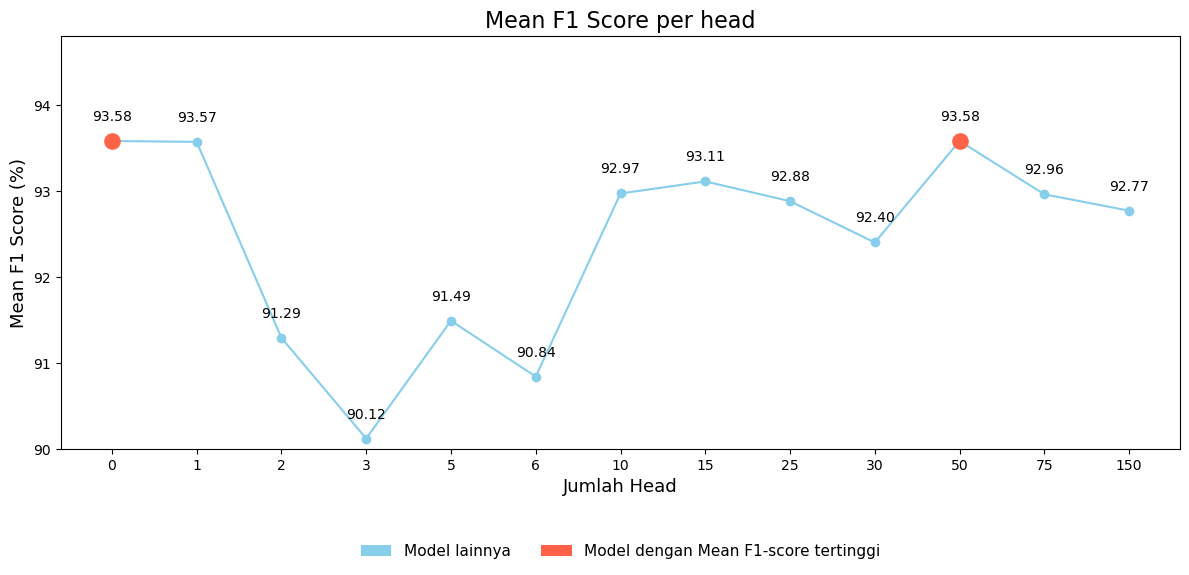

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV
df = pd.read_csv("conf_by_category.csv")

# Convert head columns to numeric
head_columns = df.columns[1:]
df[head_columns] = df[head_columns].apply(pd.to_numeric, errors='coerce')

# Extract Mean row
mean_row = df[df['Kategori'] == 'Mean'].iloc[0]
mean_scores = mean_row[1:].astype(float)
heads = [col.replace('head ', '') for col in head_columns]
head_indices = np.arange(len(head_columns))

# Find max value(s) — highlight all equal maxes
max_score = mean_scores.max()
highlight_mask = mean_scores == max_score

# Plot
plt.figure(figsize=(12, 6))
plt.plot(head_indices, mean_scores, marker='o', linestyle='-', color='skyblue', label='Mean F1 Score')

# Highlight points with max score
plt.scatter(
    head_indices[highlight_mask],
    mean_scores[highlight_mask],
    color='tomato',
    s=120,
    zorder=5,
    label='Highest Mean Accuracy'
)

# Annotate scores
for i, score in enumerate(mean_scores):
    plt.text(head_indices[i], score + 0.2, f'{score:.2f}', 
             ha='center', va='bottom', fontsize=10, rotation=0)

# Set x-axis with head labels
plt.xticks(head_indices, heads, fontsize=10)
plt.xlabel("Jumlah Head", fontsize=13)
plt.ylabel("Mean F1 Score (%)", fontsize=13)
plt.title("Mean F1 Score per head", fontsize=16)
plt.ylim(90, 94.8)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='skyblue', label='Model lainnya'),
    Patch(facecolor='tomato', label='Model dengan Mean F1-score tertinggi')
]
plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2, frameon=False, fontsize=11)

plt.tight_layout()
plt.show()

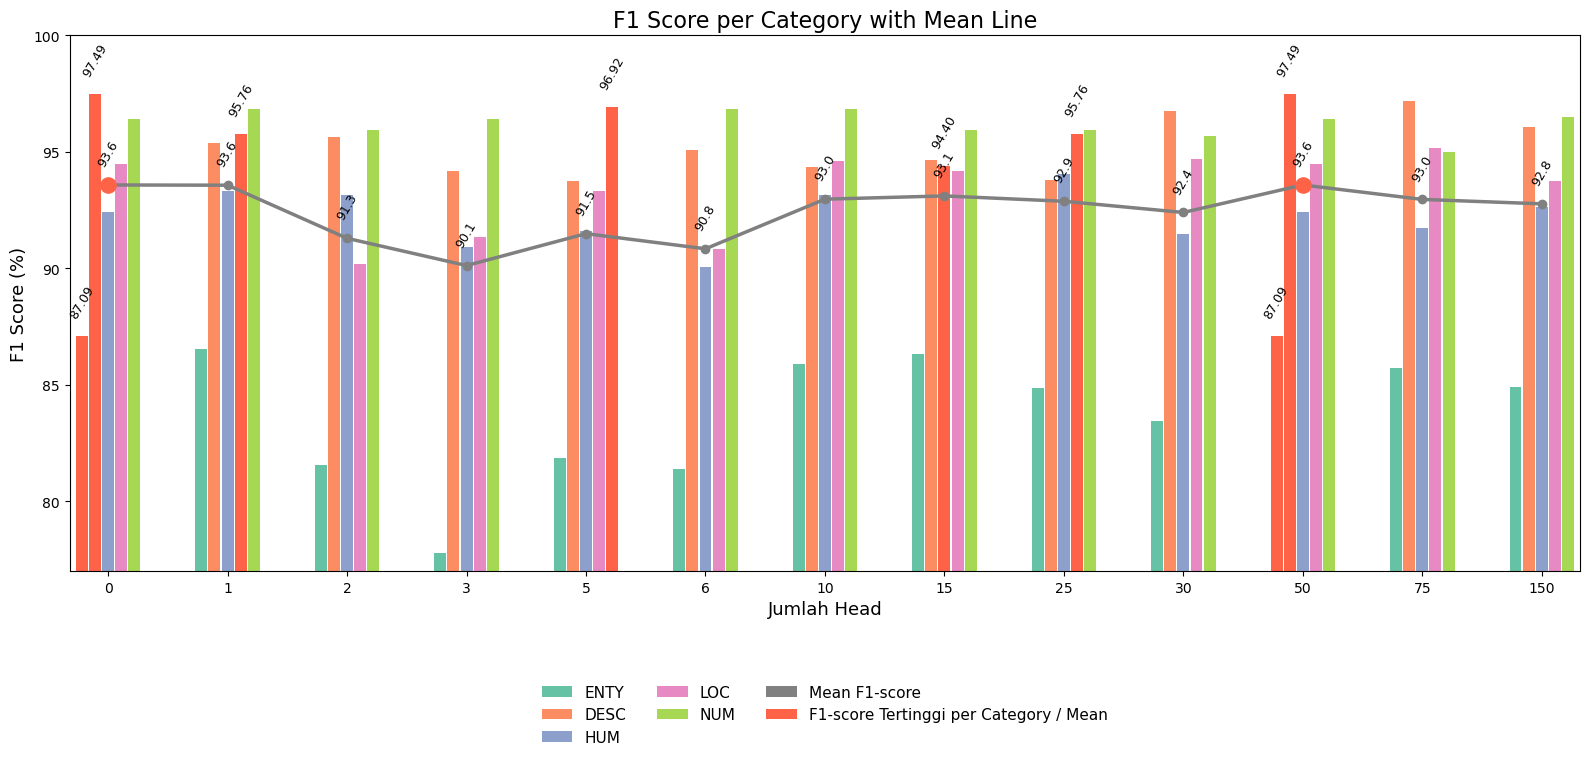

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Load data
df = pd.read_csv("conf_by_category.csv")
head_columns = df.columns[1:]
df[head_columns] = df[head_columns].apply(pd.to_numeric, errors='coerce')

# Separate mean row
mean_row = df[df['Kategori'] == 'Mean'].iloc[0][1:]
df_no_mean = df[df['Kategori'] != 'Mean'].reset_index(drop=True)

# Setup
num_heads = len(head_columns)
num_categories = len(df_no_mean)
bar_width = 0.1
bar_gap = 0.01
x = np.arange(num_heads)
category_offsets = np.linspace(
    -((num_categories - 1) / 2) * (bar_width + bar_gap),
    ((num_categories - 1) / 2) * (bar_width + bar_gap),
    num_categories
)

# Colors
default_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
highlight_color = 'tomato'

# Create plot
plt.figure(figsize=(16, 8))

# Store bar heights for annotation
bar_tops = np.zeros((num_categories, num_heads))

# Plot bars with highlight if max
for i, (idx, row) in enumerate(df_no_mean.iterrows()):
    scores = row[1:].values
    xpos = x + category_offsets[i]
    
    # Find max F1 for this category
    max_val = scores.max()
    colors = [highlight_color if s == max_val else default_colors[i] for s in scores]

    plt.bar(xpos, scores, width=bar_width, color=colors, label=row['Kategori'] if i == 0 else None)
    bar_tops[i] = scores

    # Annotate only highlighted bars
    for j, s in enumerate(scores):
        if s == max_val:
            xpos_j = xpos[j]
            plt.text(xpos_j, s + 0.8, f'{s:.2f}', ha='center', fontsize=9, rotation=60, color='black')

# Mean line
mean_scores = mean_row.values.astype(float)
plt.plot(x, mean_scores, color='gray', marker='o', linewidth=2.5, label='Mean F1 Score')

# Highlight max mean values
max_mean = mean_scores.max()
highlight_mask = mean_scores == max_mean
plt.scatter(x[highlight_mask], mean_scores[highlight_mask], color=highlight_color, s=120, zorder=5, label='Highest Mean')

# Annotate mean scores
for i, score in enumerate(mean_scores):
    plt.text(x[i], score + 0.7, f'{score:.1f}', ha='center', va='bottom', fontsize=9, rotation=60)

# Axis and ticks
head_labels = [col.replace('head ', '') for col in head_columns]
plt.xticks(x, head_labels, fontsize=10)
plt.xlabel("Jumlah Head", fontsize=13)
plt.ylabel("F1 Score (%)", fontsize=13)
plt.title("F1 Score per Category with Mean Line", fontsize=16)
plt.ylim(77, 100)

# Reduce side space
left_most = x[0] + category_offsets[0] - bar_width
right_most = x[-1] + category_offsets[-1] + bar_width
plt.xlim(left_most, right_most)

# Custom legend
legend_elements = [Patch(facecolor=default_colors[i], label=cat) for i, cat in enumerate(df_no_mean['Kategori'])]
legend_elements += [
    Patch(facecolor='gray', label='Mean F1-score'),
    Patch(facecolor=highlight_color, label='F1-score Tertinggi per Category / Mean')
]
plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=3, fontsize=11, frameon=False)

plt.tight_layout()
plt.show()